In [1]:
import sys
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [2]:
X = pickle.load(open( "../../data/preprocessed/article-genetic-data-features.p", "rb"))
y = pickle.load(open( "../../data/preprocessed/article-genetic-data-labels.p", "rb"))

print(type(X), " | ", X.shape)
print(type(y), " | ", len(y))

<class 'pandas.core.frame.DataFrame'>  |  (241, 1309)
<class 'pandas.core.series.Series'>  |  241


In [3]:
preds = pickle.load(open( "../predictions/gbm-loocv-bestparams-genetic-preds.p", "rb"))

preds

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

### Method to plot 2 different t-SNE projections: (1) original sample labels, (2) original vs predicted sample labels

In [4]:
def tsne_projections(X, y, perplexity):    
    print('- Projecting by tSNE')
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=2000)
    X = tsne.fit_transform(X)   

    Xf = X[y == 0]  # all projected samples with response = 0 (refractory)
    Xt = X[y == 1]  # all projected samples with response = 1 (responsive)
   
    print('- Plotting projected feats')
    fig, axs = plt.subplots(2, 1, figsize=(15,15))
    ax1, ax2 = axs[0], axs[1]
    
    ax1.set_title('t-SNE using the original sample labels (perplexity=%d)' % perplexity)
    line1, = ax1.plot(Xf[:,0], Xf[:,1], 'ro', linewidth=0.5, picker=5, label='Refractory')
    line2, = ax1.plot(Xt[:,0], Xt[:,1], 'bo', linewidth=0.5, picker=5, label='Responsive')
    ax1.legend(handles=[line1, line2])
    
    ax2.set_title('t-SNE plotting the original vs predicted sample labels (perplexity=%d)' % perplexity)
    for i, (x, label, pred) in enumerate(zip(X, y, preds)):      
        # if prediction of responsive patient is correct, use blue color (TRUE POSITIVE),
        # otherwise the prediction is incorrect, it said it was refractory, red color will be used (FALSE NEGATIVE)
        color = 'b' if label == 1 and label == pred else 'r' 
        
        # if prediction of refractory patient is correct, use red color (TRUE NEGATIVE),
        # otherwise the prediction is incorrect, it said it was responsive, blue color will be used (FALSE POSITIVE)
        color = 'r' if label == 0 and label == pred else 'b' 
        
        # if it is an original responsive patient use triangle format (POSITIVE), 
        # otherwise it is an original refractory patient and the circle format will be used (NEGATIVE)
        ax2.scatter(x[0], x[1], marker='v' if label == 1 else 'o', color=color)  

    plt.show()

- Projecting by tSNE
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 241 samples in 0.000s...
[t-SNE] Computed neighbors for 241 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 241 / 241
[t-SNE] Mean sigma: 2.605072
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.913803
[t-SNE] KL divergence after 1150 iterations: 0.931687
- Plotting projected feats


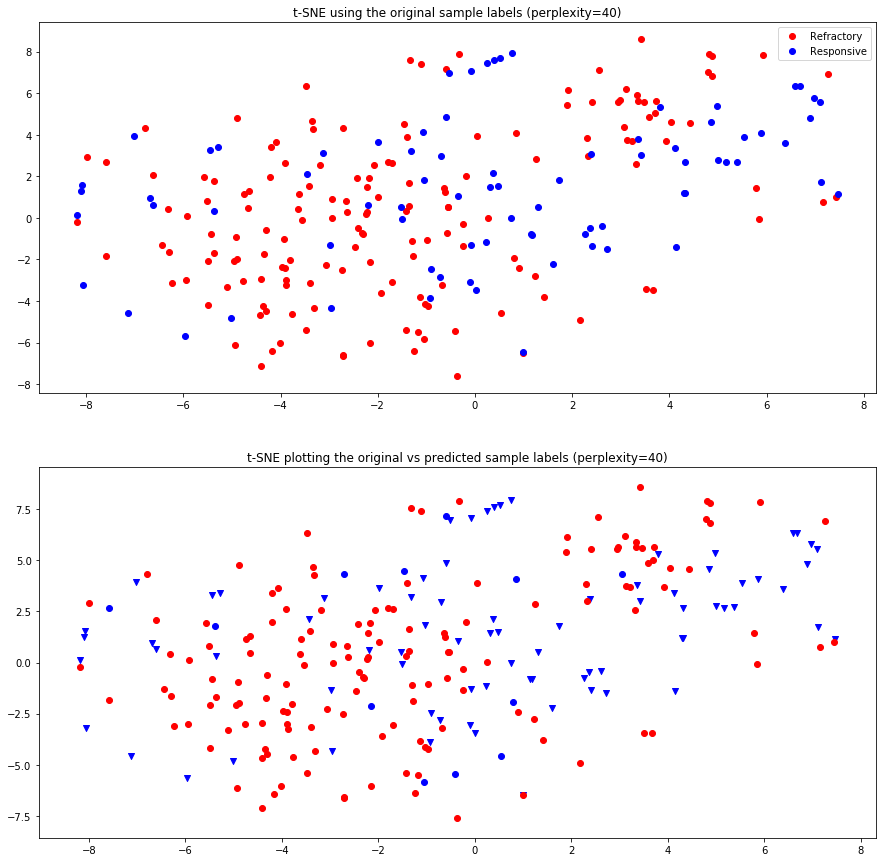

In [5]:
perplexity = 40

tsne_projections(X, y, perplexity)